In [49]:
import numpy as np
#import torch
import matplotlib.pyplot as plt

In [88]:
def mask_map(m, n_min=3, n_max=7):
    mask = np.zeros((24,24))
    new_m = np.zeros((24,24))
    r = np.random.randint(1,5)
    n = np.random.randint(n_min, n_max)
    pos = np.random.randint(0,24,(n,2))
    for p in pos:
        new_m[max(0,p[0]-r):min(24,p[0]+r+1),max(0,p[1]-r):min(24,p[1]+r+1)] = m[max(0,p[0]-r):min(24,p[0]+r+1),max(0,p[1]-r):min(24,p[1]+r+1)]
        mask[max(0,p[0]-r):min(24,p[0]+r+1),max(0,p[1]-r):min(24,p[1]+r+1)] = 1
    #print(pos, r, n)
    return new_m, mask
    

In [93]:
def energy_function(d):
    return np.sin(1.2*d+1)*4
def calculate_energy(pos):
    pos2 = [abs(pos[1]-23),abs(pos[0]-23)]
    a = np.stack((np.repeat(np.arange(24),24,axis=0).reshape((24,24)),
                  np.repeat(np.arange(24),24,axis=0).reshape((24,24)).T),axis=2)
    e1 = energy_function(np.linalg.norm(a-np.array(pos),axis=2))
    e2 = energy_function(np.linalg.norm(a-np.array(pos2),axis=2))
    e = np.array([e1,e2])
    e = np.where(
            e.mean() < 0.25,
            e + (0.25 - e.mean()),
            e,
        )
    e = np.round(e.sum(0)).astype(np.int16)+1
    e = np.clip(
            e, -10, 10
        )
    return e

In [82]:
a = np.random.randint(-10,10,(24,24))
a = np.round(a.sum(0))
print(a)

[ -9  -9 -13 -67 -19  55   7 -22 -20  -9   7  -9 -17 -56  34 -43   4 -18
  13   3   2 -28  20 -63]


In [94]:
energy_maps = []
positions = []
for x in range(24):
    for y in range(24):
        if x+y>23:
            break
        energy_maps.append(calculate_energy([x,y]))
        positions.append([x,y])
    

In [76]:
import json
mini = 0
maxi = 0
for i in range(50):
    with open(f'replays/episode_{i}.json') as f:
        d = json.load(f)
    for j in range(20):
        b = d["observations"][25*j]["map_features"]["energy"]
        if np.array(b).min()<mini:
            mini = np.array(b).min()
        if np.array(b).max()>maxi:
            maxi = np.array(b).max()
print(mini, maxi)

-7 10


In [ ]:
plt.imshow(b)

In [ ]:
for m in range(10):
    plt.imshow(energy_maps[m])
    plt.show()

In [ ]:
np.save("energy_data.npy", energy_maps)
np.save("energy_targets.npy", positions)

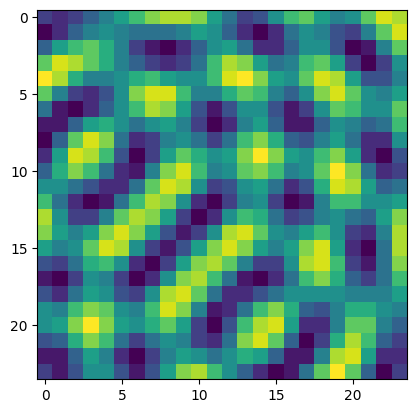

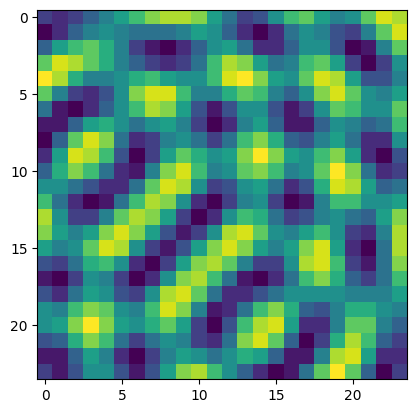

0


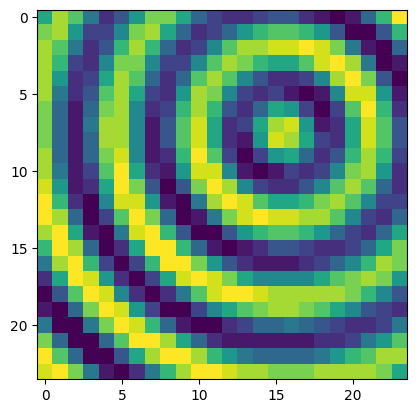

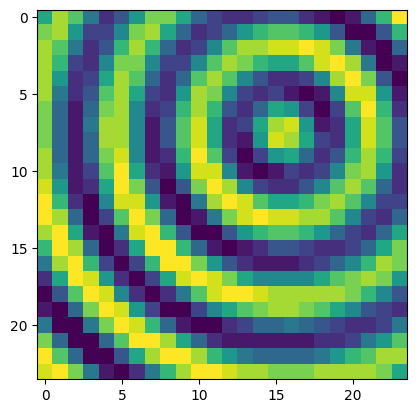

0


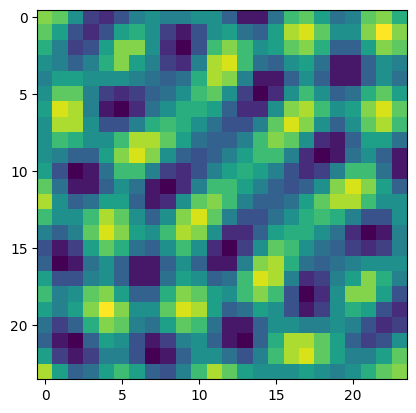

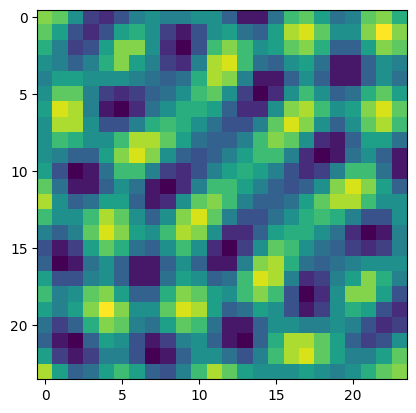

0


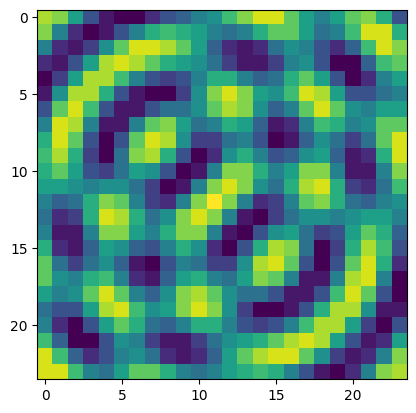

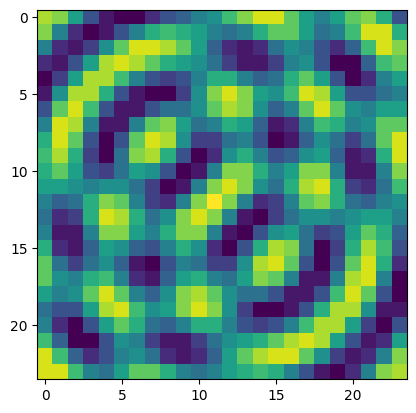

0


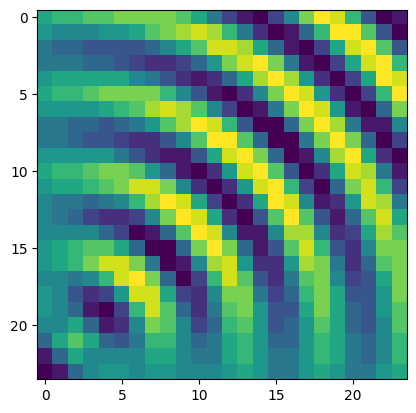

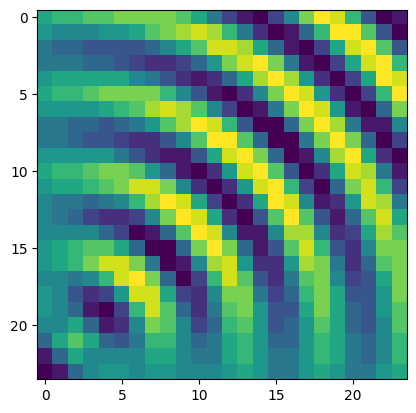

0


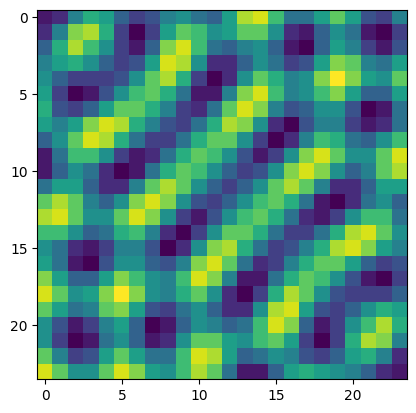

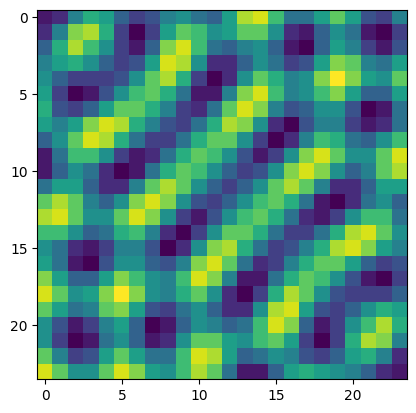

0


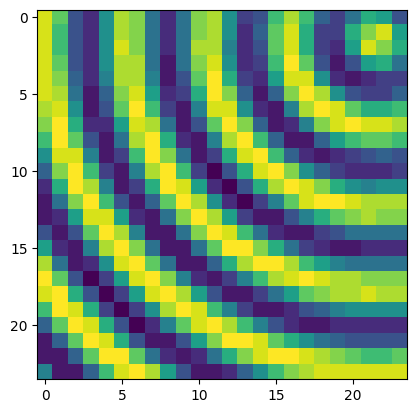

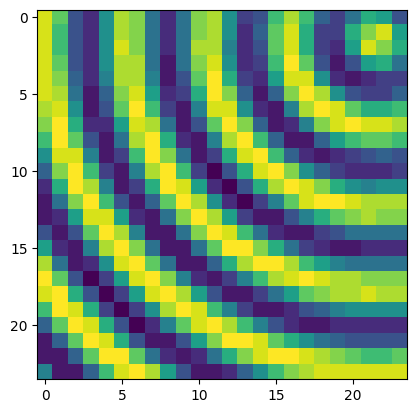

0


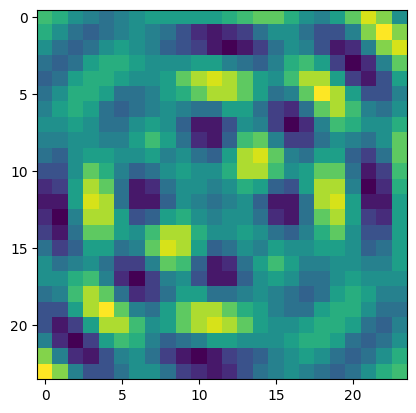

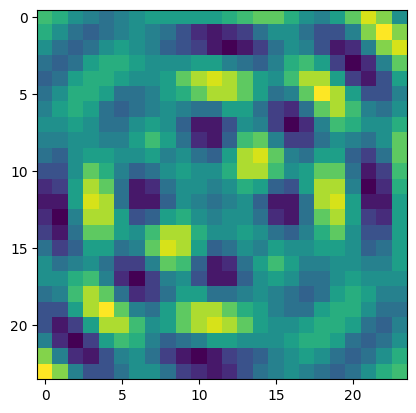

0


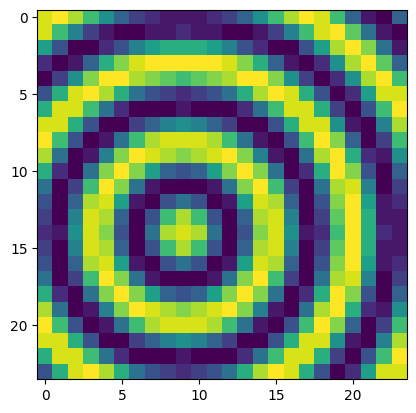

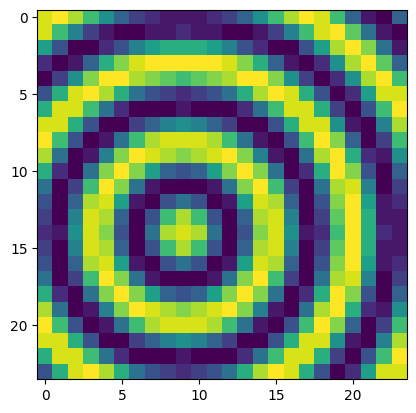

0


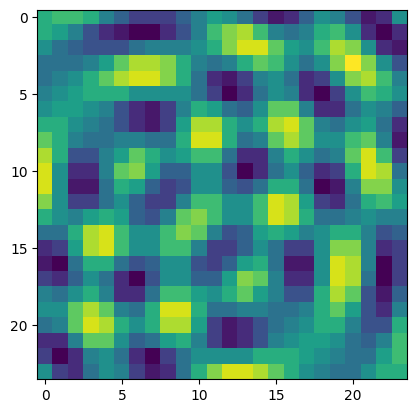

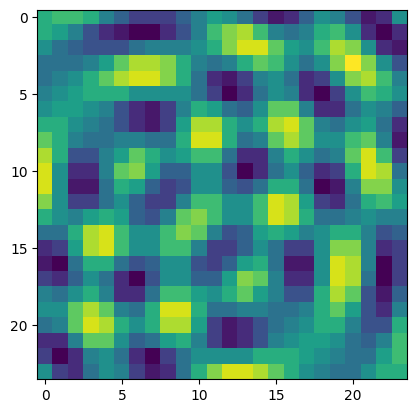

0


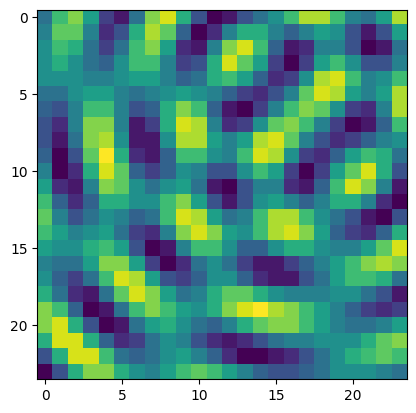

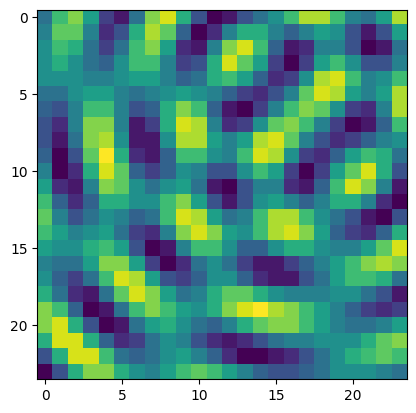

0


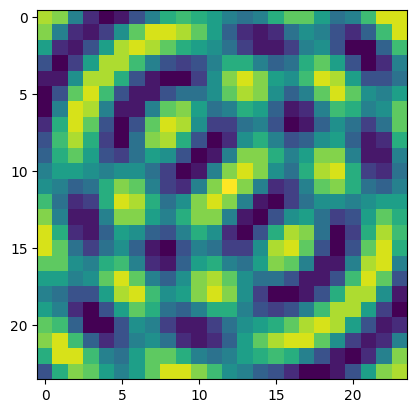

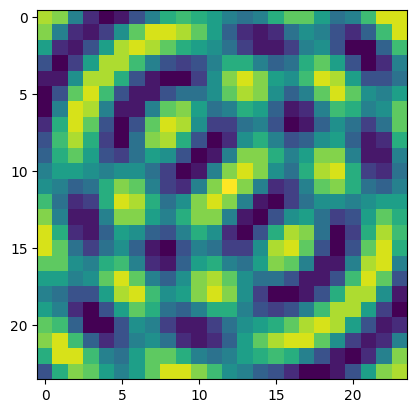

0


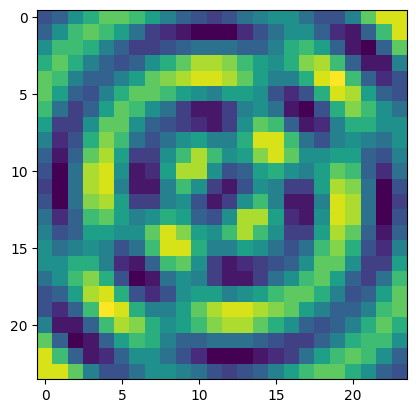

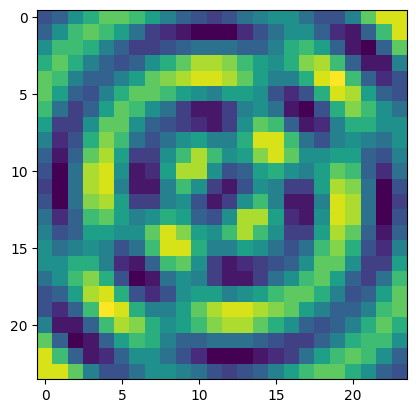

0


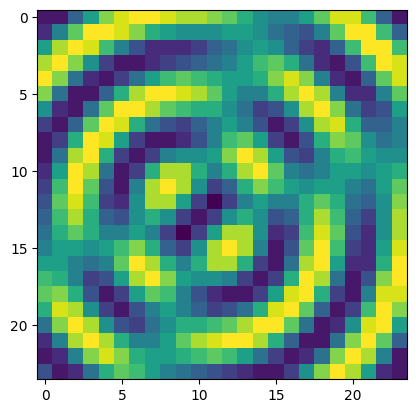

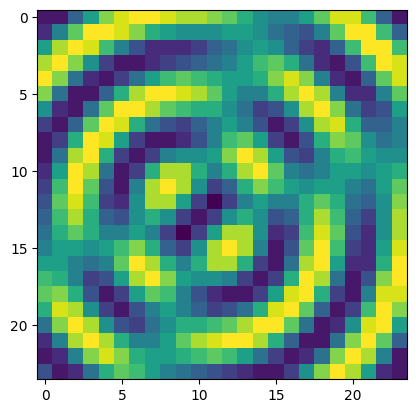

0


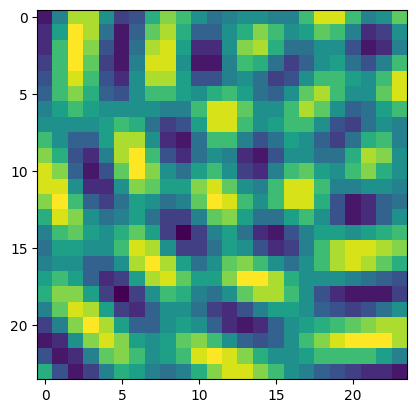

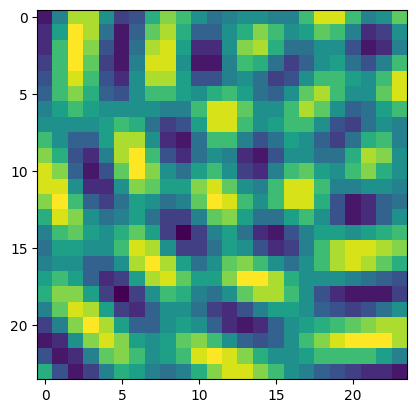

0


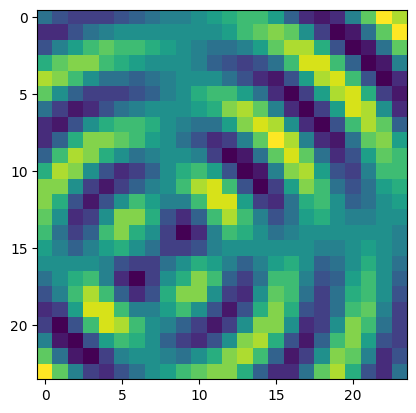

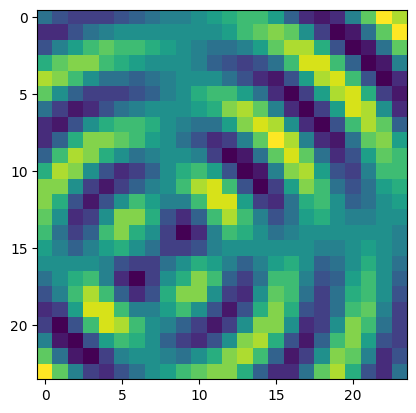

0


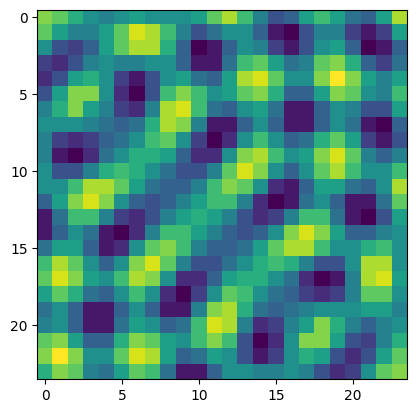

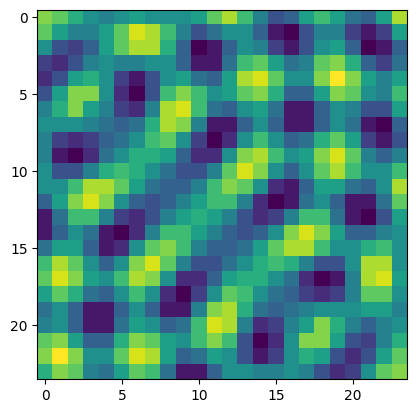

0


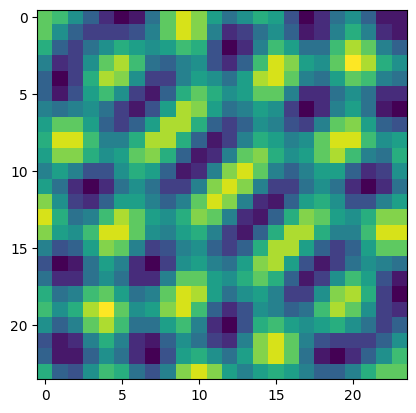

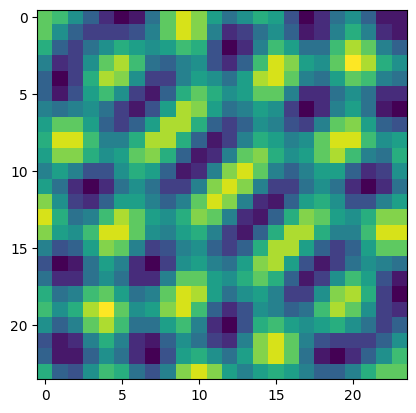

0


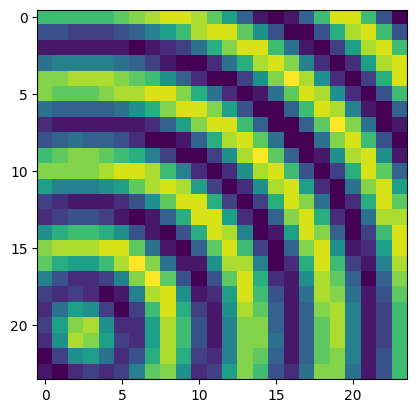

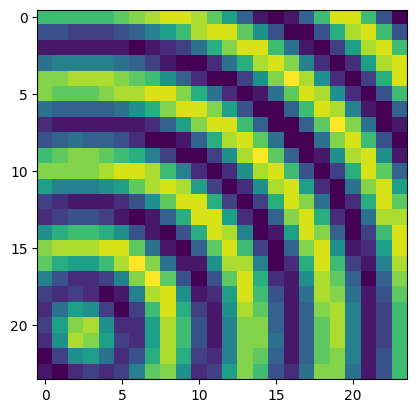

0


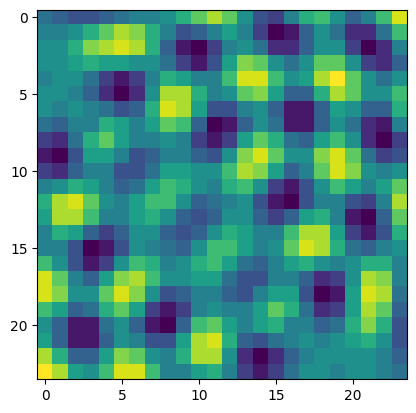

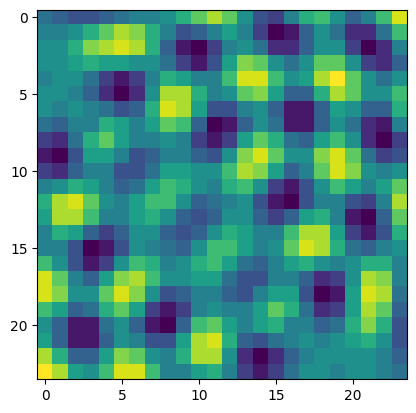

0


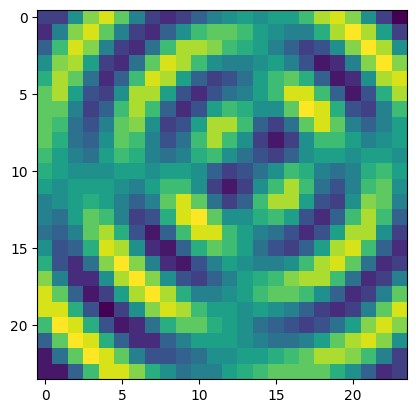

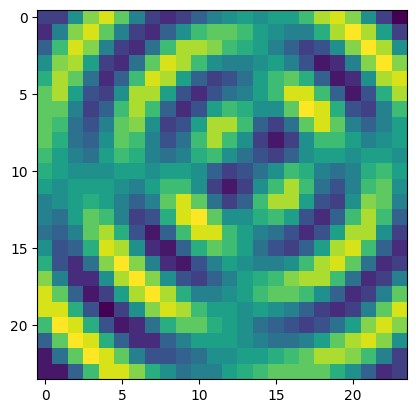

0


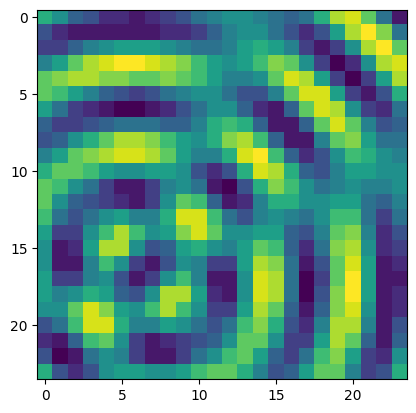

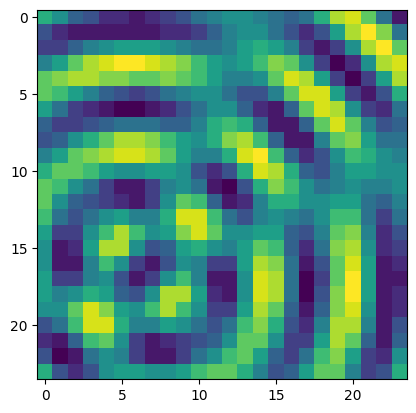

0


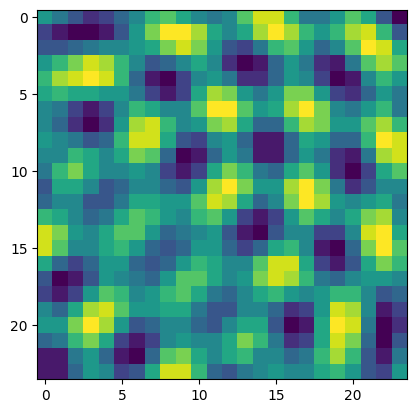

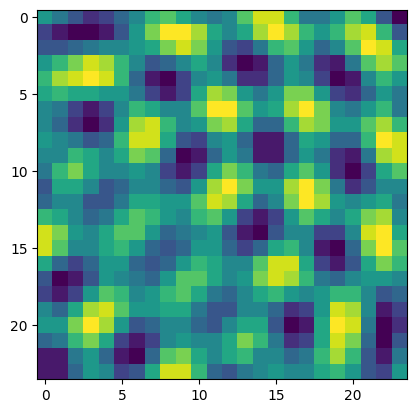

0


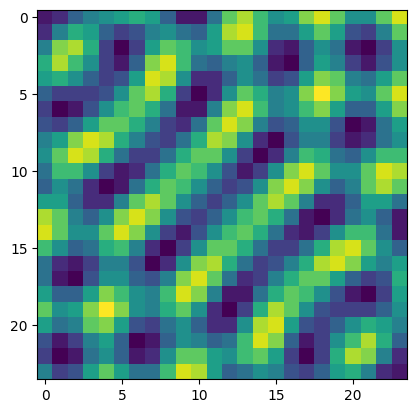

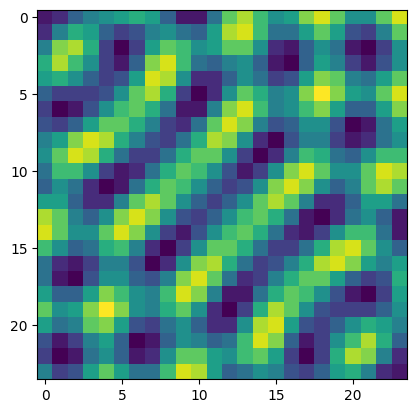

0


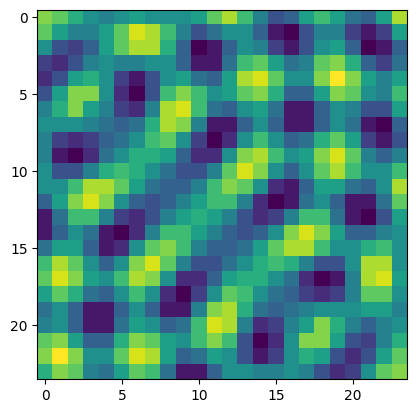

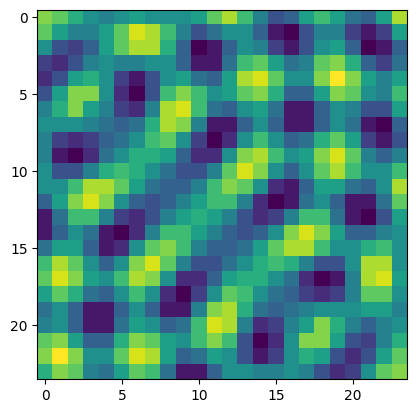

0


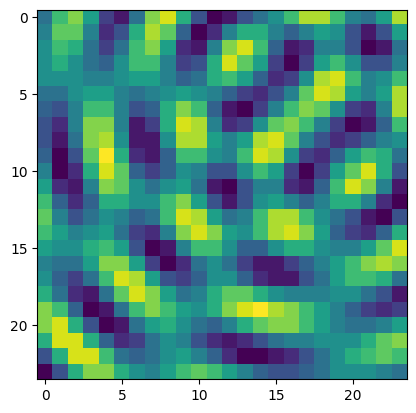

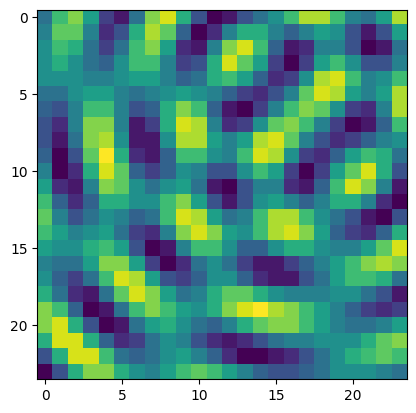

0


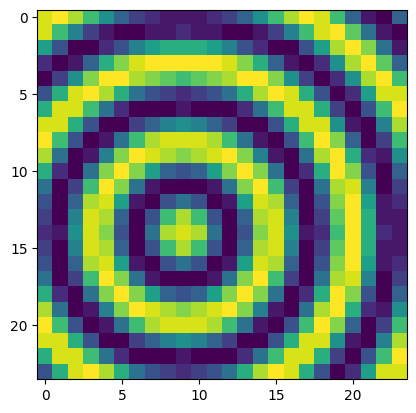

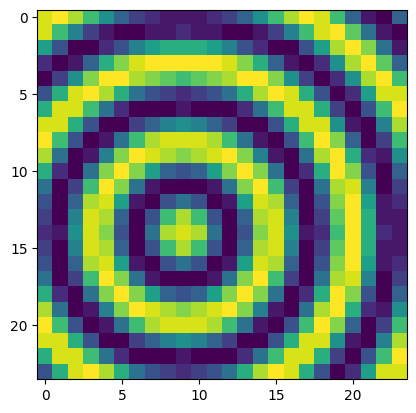

0


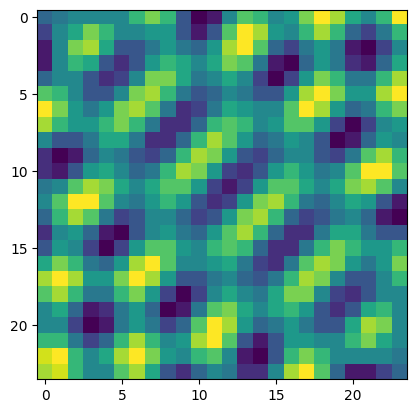

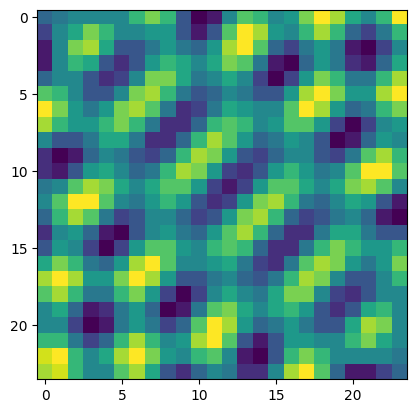

0


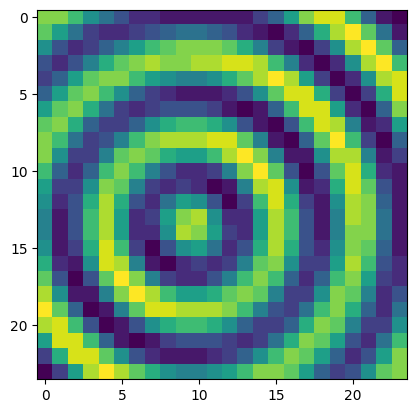

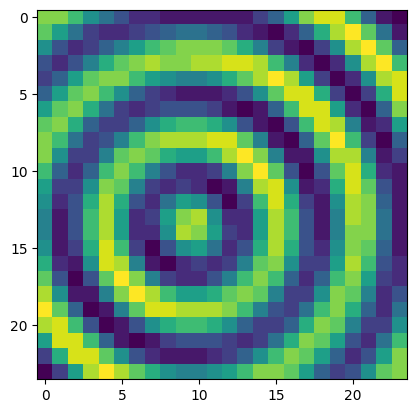

0


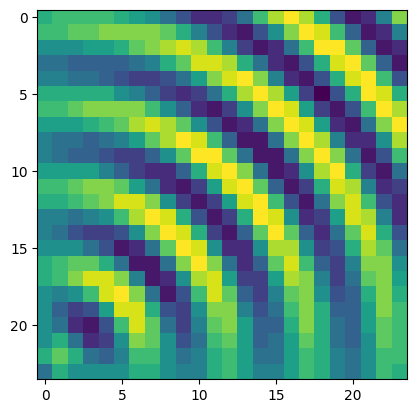

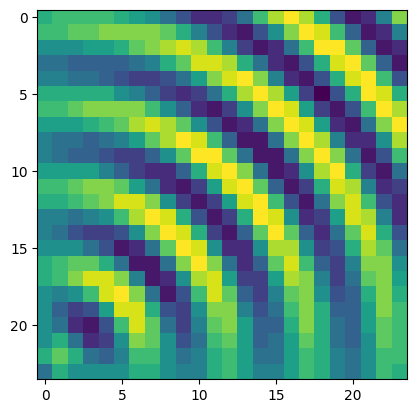

0


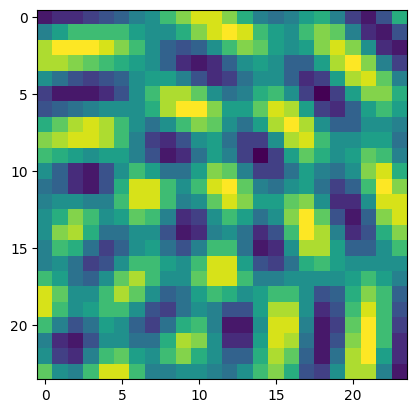

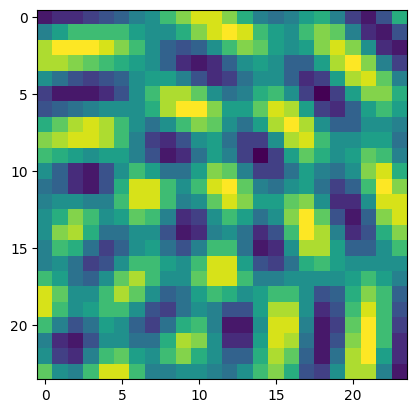

0


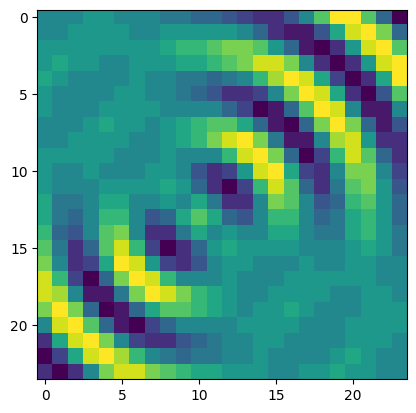

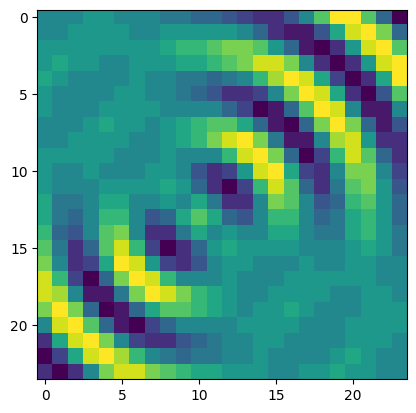

0


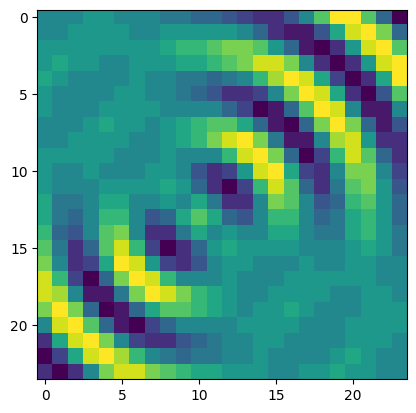

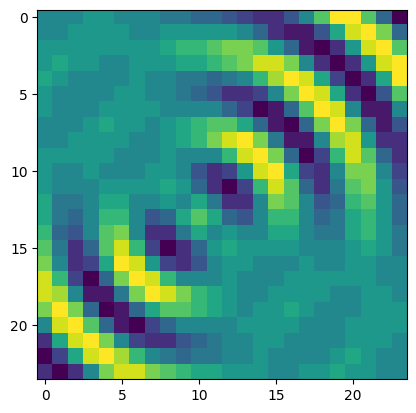

0


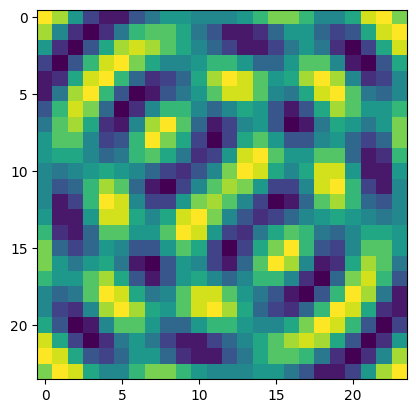

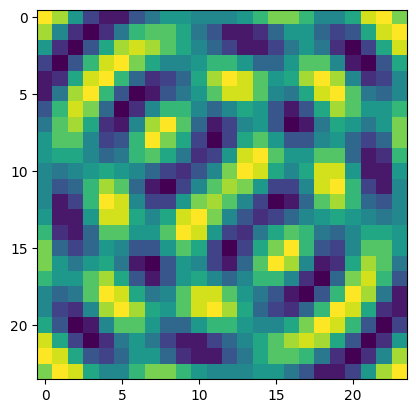

0


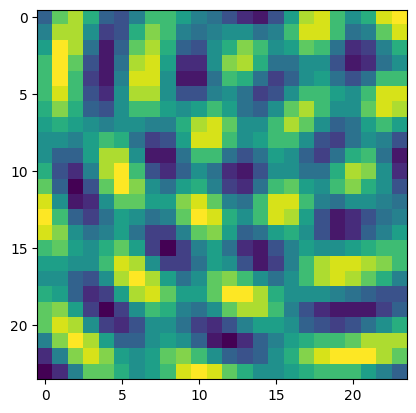

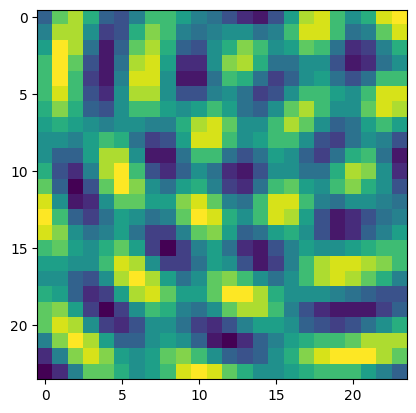

0


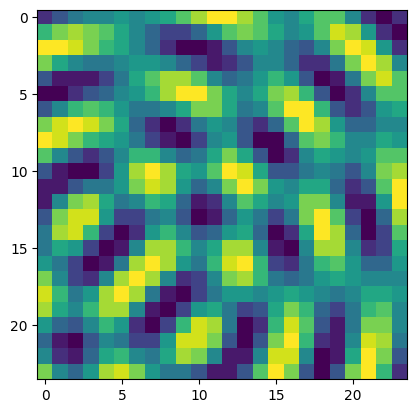

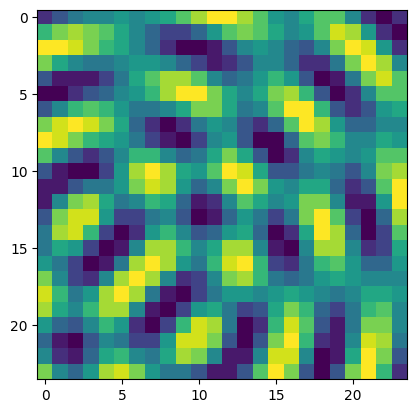

0


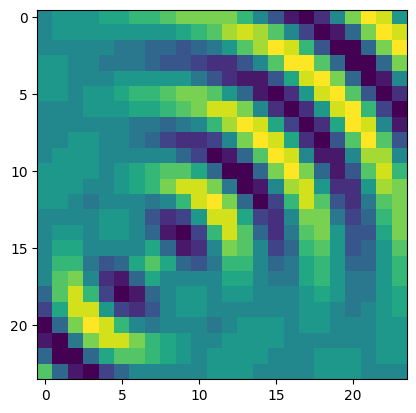

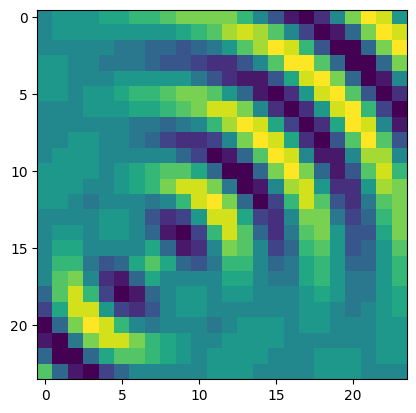

0


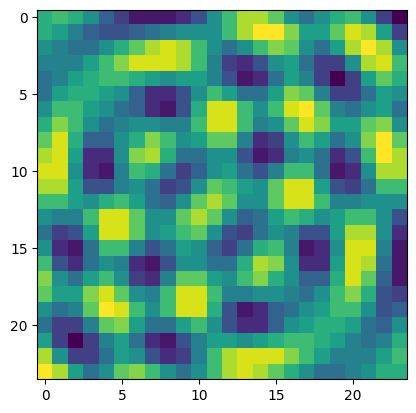

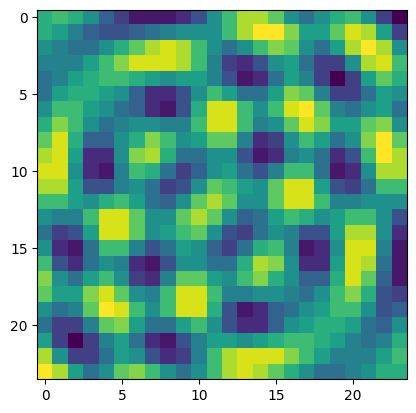

0


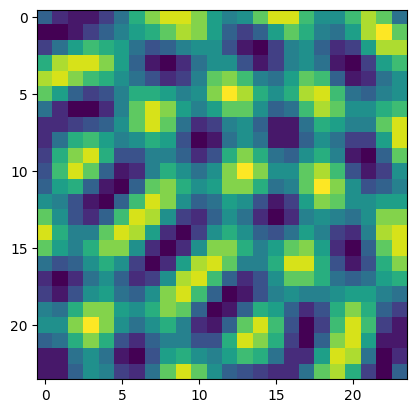

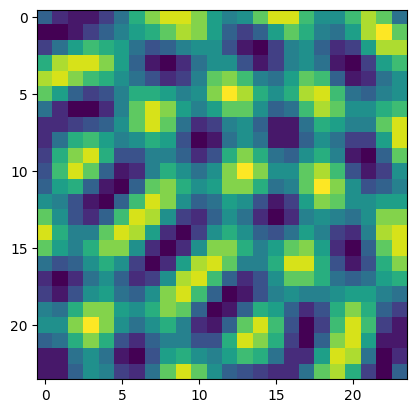

0


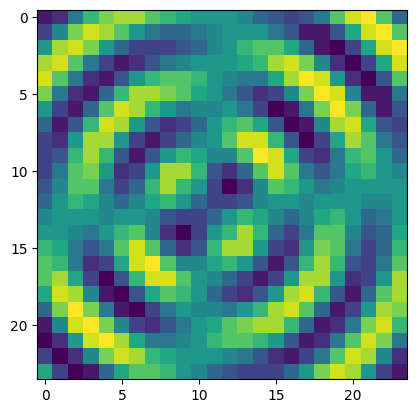

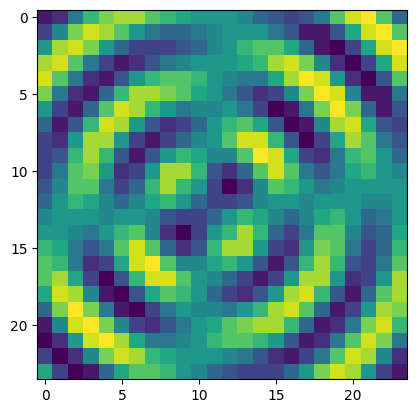

0


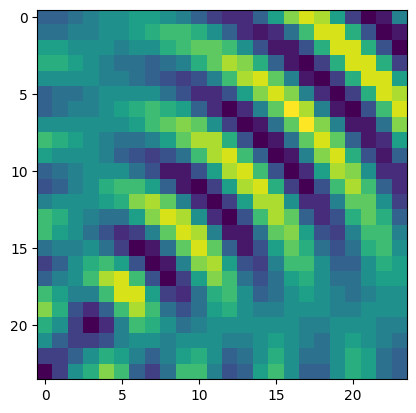

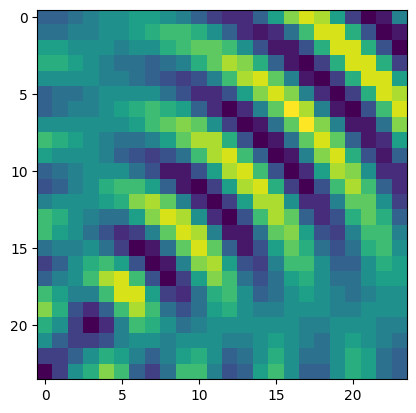

0


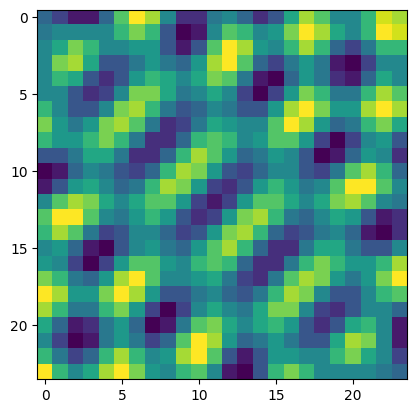

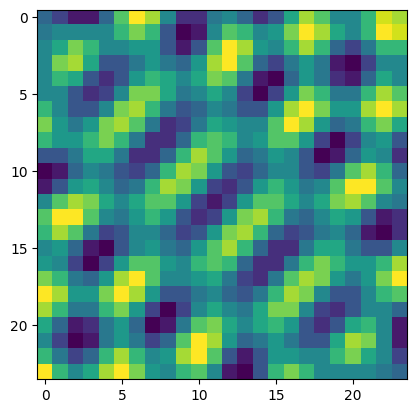

0


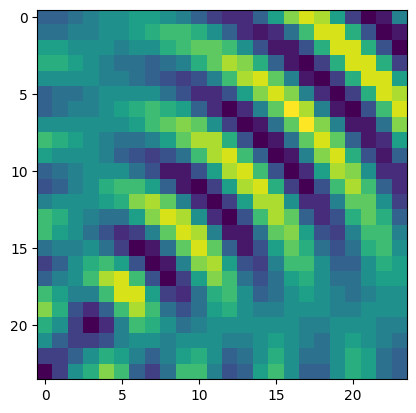

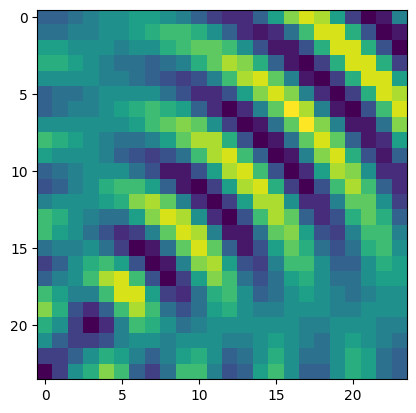

0


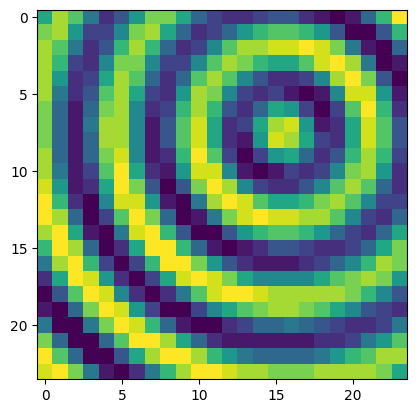

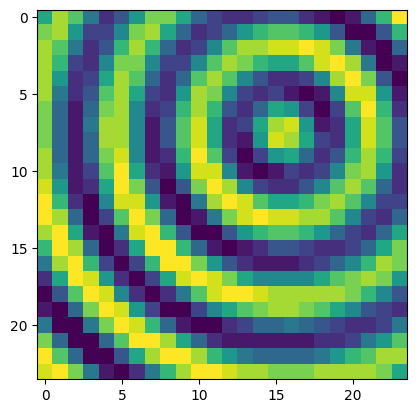

0


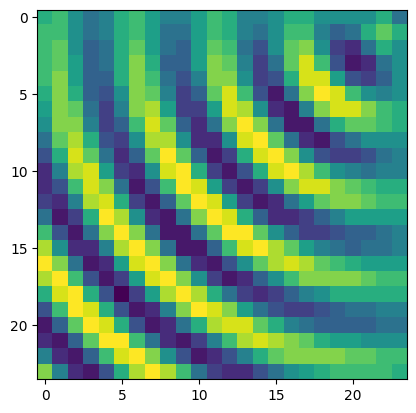

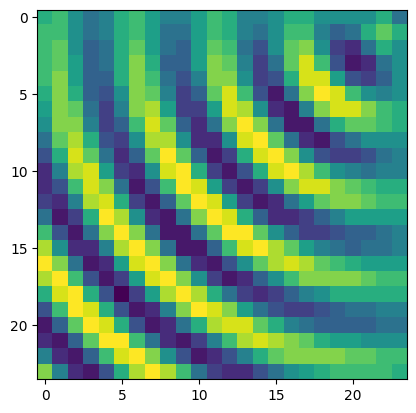

0


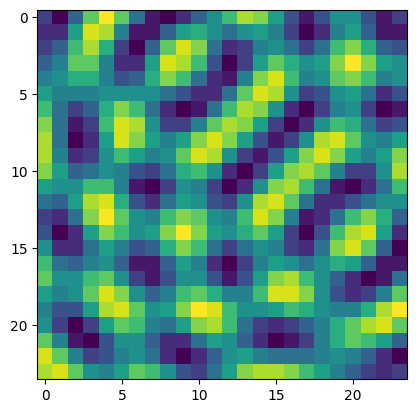

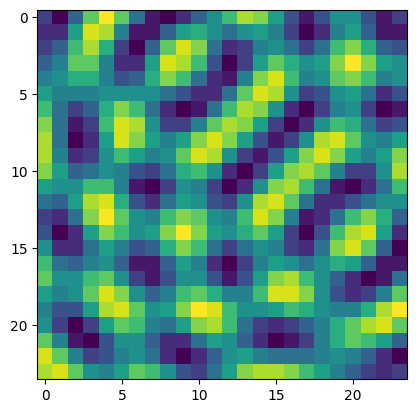

0


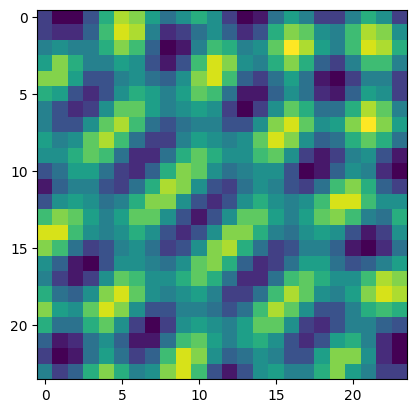

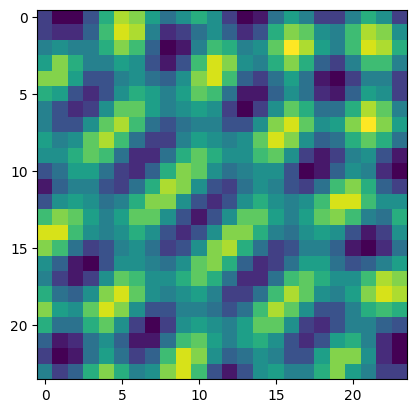

0


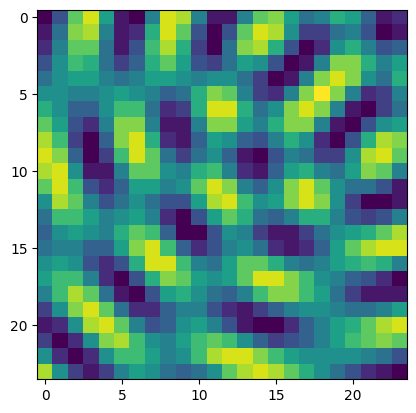

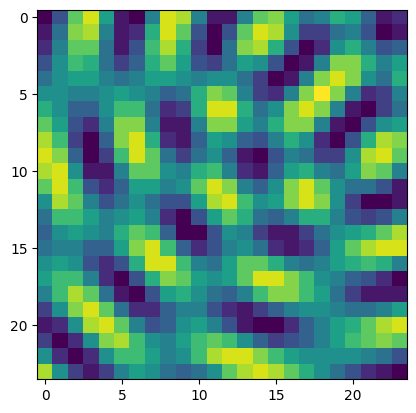

0


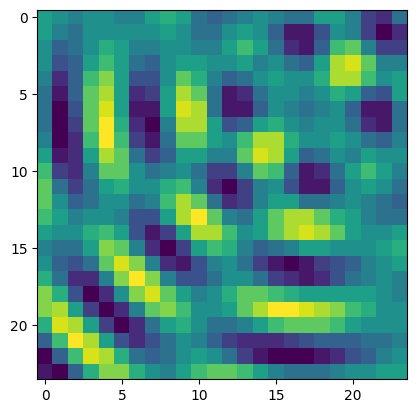

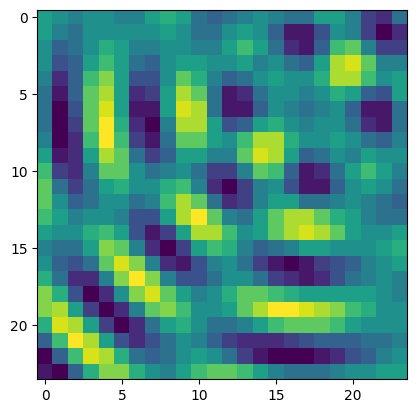

0


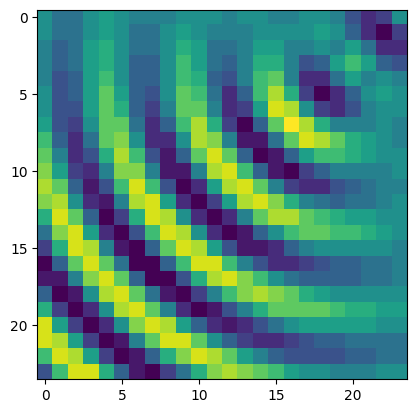

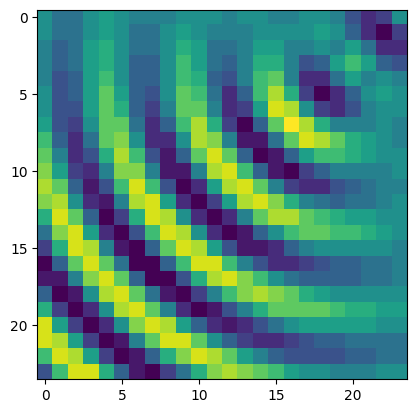

0


In [95]:
for i in range(50):
    with open(f'replays/episode_{i}.json') as f:
        d = json.load(f)
    b = d["observations"][0]["map_features"]["energy"]
    m_read, mask = mask_map(np.array(b))
    #start = time.time()
    lowest = None
    best_low = np.inf
    c = 0
    for m2 in energy_maps:
        if (np.sum(np.abs(m_read-m2*mask)))<best_low:
            lowest = m2
            best_low = (np.sum(np.abs(m_read-m2*mask)))
    #print(time.time()-start, c)
    #print(c)
    plt.imshow(b)
    plt.show()
    plt.imshow(lowest)
    plt.show()
    #print(b)
    #print(lowest)
    print((b-lowest).sum())